In [1]:
import numpy as np
from scipy.linalg import eig, inv, det

In [2]:
def matrix_properties(matrix):
    properties = {}
    properties['Determinant'] = det(matrix)
    properties['Trace'] = np.trace(matrix)
    properties['Rank'] = np.linalg.matrix_rank(matrix)
    properties['Is Symmetric'] = np.allclose(matrix, matrix.T)
    
    try:
        properties['Inverse'] = inv(matrix)
    except np.linalg.LinAlgError:
        properties['Inverse'] = "Non-invertible matrix"

    eigenvalues, eigenvectors = eig(matrix)
    properties['Eigenvalues'] = eigenvalues
    properties['Eigenvectors'] = eigenvectors
    
    return properties

# Example matrix
matrix = np.array([
    [4, 0, 2],
    [0, 3, 0],
    [2, 0, 4]
])

# Get matrix properties
props = matrix_properties(matrix)

# Print the properties
for prop, value in props.items():
    print(f"{prop}:")
    print(value, "\n")

Determinant:
36.0 

Trace:
11 

Rank:
3 

Is Symmetric:
True 

Inverse:
[[ 0.33333333  0.         -0.16666667]
 [ 0.          0.33333333 -0.        ]
 [-0.16666667  0.          0.33333333]] 

Eigenvalues:
[6.+0.j 2.+0.j 3.+0.j] 

Eigenvectors:
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]] 



##### Explanation:
- Determinant and Trace: Basic properties calculated directly from the matrix.
- Inverse: Computed if the matrix is non-singular (determinant is not zero).
- Eigenvalues and Eigenvectors: Obtained using the eig function, which returns both.
- Rank: The number of linearly independent rows or columns.
- Symmetry Check: Determines if the matrix is symmetric by checking if it equals its transpose.

In [3]:
import numpy as np
from numpy.linalg import eig, det, matrix_power, norm
from scipy.linalg import eigh

([[-1, 3/2]])
([[1, 1]])

([[-1, 3/2]])
([[2/3, 1]])

In [4]:
# Question 1: Matrix properties
matrices = [
    np.array([[-1, 3/2], [1, -1]]),
    np.array([[-1, 3/2], [2/3, -1]]),
    np.eye(3)  # Identity matrix 3x3
]

# Show properties of matrices
for i, matrix in enumerate(matrices):
    print(f"Matrix {i+1} determinant: {det(matrix)}")
    print(f"Matrix {i+1} eigenvalues: {eig(matrix)[0]}")
    print()

Matrix 1 determinant: -0.5
Matrix 1 eigenvalues: [ 0.22474487 -2.22474487]

Matrix 2 determinant: 0.0
Matrix 2 eigenvalues: [-1.11022302e-16 -2.00000000e+00]

Matrix 3 determinant: 1.0
Matrix 3 eigenvalues: [1. 1. 1.]



- first of all the matrix multiplication doesn't work becaue the dimentions of the identity matrix don't match the previous matrices.

In [5]:
# Question 2: Show that A^n = XΛ^nX^-1
A = np.array([[1, 1], [1, 0]])
eigenvalues, eigenvectors = eig(A)
Lambda = np.diag(eigenvalues)
n = 5  # Example power
A_n = matrix_power(A, n)
X = eigenvectors
X_inv = np.linalg.inv(X)
A_n_formulated = X @ matrix_power(Lambda, n) @ X_inv
print(f"A^n calculated: \n{A_n}")
print(f"A^n using formula: \n{A_n_formulated}")

A^n calculated: 
[[8 5]
 [5 3]]
A^n using formula: 
[[8. 5.]
 [5. 3.]]


# <center> **First Mini Project - Preliminaries </center>**

### <center>Massive Graph Management and Analytics </center>

---


---

##### <center>Authors: Benjamin Gold & Dilbar Isakova</center>
##### <center>Professor: Nacera Seghuoani</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
import networkx as nx

### Vectors and Matrices

- Here, we are using numpy to define vectors and matrices and performing operations on them
- Also, we can operate with them as we would do in linear algebra

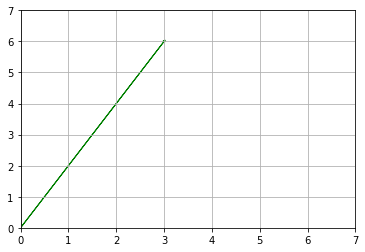

In [9]:
vector = np.array([3, 6])

# show the vector as an arrow
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='green')
plt.axis([0, 7, 0, 7])
plt.grid()
plt.show()

In [10]:
matrix = np.array([[1, 4], [6, 1]])
print(matrix)

[[1 4]
 [6 1]]


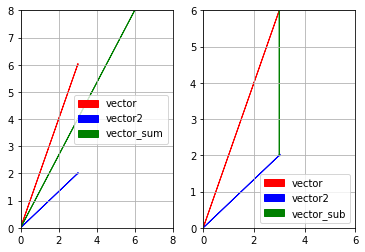

In [13]:
vector2 = np.array([3, 2])

vector_sum = vector + vector2
vector_sub = vector - vector2

plt.subplot(1, 2, 1)
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='blue', label='vector2')
plt.arrow(0, 0, vector_sum[0], vector_sum[1], head_width=.05, head_length=0.05, color='green', label='vector_sum')
plt.axis([0, 8, 0, 8])
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='blue', label='vector2')
plt.arrow(vector2[0], vector2[1], vector_sub[0], vector_sub[1], head_width=.05, head_length=0.05, color='green', label='vector_sub')
plt.axis([0, 6, 0, 6])
plt.grid()
plt.legend()

plt.show()